In [122]:
from torchvision import datasets,transforms
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

random_seed = 1
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

In [22]:
transformation = transforms.Compose([
    transforms.ToTensor()
])

In [23]:
train_dataset = datasets.MNIST('data/',train=True,download=True,transform=transformation)
test_dataset = datasets.MNIST('data/',train=False,download=True,transform=transformation)

In [24]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=10,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=10,shuffle=True)

In [93]:
train_data = next(iter(train_loader))

print("Number of batches: {}".format(len(train_loader)))

print("Shape of each batch: {}".format(np.array(train_data[0]).shape))

print("shape of each image: {}".format(np.array(train_data[0][1]).shape))




Number of batches: 6000
Shape of each batch: (10, 1, 28, 28)
shape of each image: (1, 28, 28)


In [119]:
def plot_image(image):
    
    image = image.numpy()[0]
    plt.imshow(image,cmap='gray')
    plt.show()

    
    
    

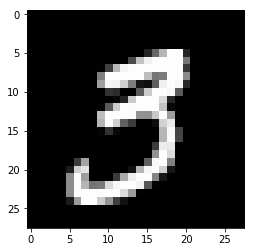

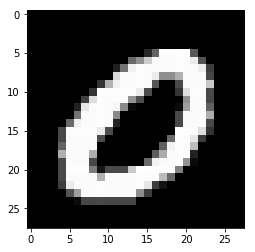

In [120]:
plot_image(train_data[0][1])
plot_image(train_data[0][2])


In [125]:
#Let's investigate the data

test = np.array(train_data[0][1])
print(np.shape(test[0]))
# print(test[0]) #uncomment that line of code to see the pixel values

#It looks like the data is not between 0 and 255, but between 0 and 1


(28, 28)


In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        
        super().__init__()

(28, 28)
